In [1]:
# Install SUMO and other required packages

!apt-get update -qq

!apt-get install -y sumo sumo-tools sumo-doc

!pip install stable-baselines3 --quiet

!pip install traci

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  binfmt-support fastjar fonts-roboto-unhinted gdal-data jarwrapper
  javascript-common libarmadillo9 libarpack2 libcfitsio8 libcharls2 libdap25
  libdapclient6v5 libepsilon1 libfox-1.6-0 libfreexl1 libfyba0 libgdal26
  libgeos-3.8.0 libgeos-c1v5 libgeotiff5 libglu1-mesa libhdf4-0-alt
  libjs-jquery libjs-openlayers libjs-underscore libkmlbase1 libkmldom1
  libkmlengine1 libminizip1 libmysqlclient21 libnetcdf15 libodbc1 libogdi4.1
  libpoppler97 libpq5 libproj15 libqhull7 libspatialite7 libsuperlu5
  liburiparser1 libxerces-c3.2 mysql-common odbcinst odbcinst1debian2
  poppler-data proj-bin proj-data
Suggested packages:
  apache2 | lighttpd | httpd geotiff-bin gdal-bin libgeotiff-epsg libhdf4-doc
  libhdf4-alt-dev hdf4-tools libmyodbc odbc-postgresql tdsodbc unixodbc-bin
  ogdi-bin poppler-utils ghostscript fonts-japanese-mincho
  | fonts-

In [2]:
import numpy as np

import random

from collections import deque


import os

import sys

import traci

import matplotlib.pyplot as plt

In [3]:
# Set SUMO_HOME environment variable

os.environ['SUMO_HOME'] = '/usr/share/sumo'



# Import traci module

if 'SUMO_HOME' in os.environ:

    tools = os.path.join(os.environ['SUMO_HOME'], 'tools')

    sys.path.append(tools)

else:

    sys.exit("Please declare environment variable 'SUMO_HOME'")

In [13]:
import os
import subprocess
import sys

import subprocess

import subprocess

def create_sumo_files():
    # Create nodes file with traffic lights
    with open('my_nodes.nod.xml', 'w') as f:
        f.write('''<nodes>
    <node id="1" x="0" y="0" type="priority"/>
    <node id="2" x="100" y="0" type="priority"/>
    <node id="3" x="25" y="50" type="priority"/>
    <node id="4" x="25" y="-50" type="priority"/>
    <node id="5" x="75" y="50" type="priority"/>
    <node id="6" x="75" y="-50" type="priority"/>
    <node id="7" x="25" y="0" type="traffic_light"/>
    <node id="8" x="75" y="0" type="traffic_light"/>
                
    <node id="e1" x="0" y="25" type="priority"/>
    <node id="e2" x="25" y="0" type="priority"/>
</nodes>''')

    # Create edges file
    with open('my_edges.edg.xml', 'w') as f:
        f.write('''<edges>
    <edge id="1to7" from="1" to="7" priority="1" numLanes="2" speed="13.89"/>
    <edge id="7to8" from="7" to="8" priority="1" numLanes="2" speed="13.89"/>
    <edge id="8to2" from="8" to="2" priority="1" numLanes="2" speed="13.89"/>
    <edge id="2to8" from="2" to="8" priority="1" numLanes="2" speed="13.89"/>
    <edge id="8to7" from="8" to="7" priority="1" numLanes="2" speed="13.89"/>
    <edge id="7to1" from="7" to="1" priority="1" numLanes="2" speed="13.89"/>
    <edge id="3to7" from="3" to="7" priority="1" numLanes="2" speed="13.89"/>
    <edge id="7to4" from="7" to="4" priority="1" numLanes="2" speed="13.89"/>
    <edge id="4to7" from="4" to="7" priority="1" numLanes="2" speed="13.89"/>
    <edge id="7to3" from="7" to="3" priority="1" numLanes="2" speed="13.89"/>
    <edge id="5to8" from="5" to="8" priority="1" numLanes="2" speed="13.89"/>
    <edge id="8to6" from="8" to="6" priority="1" numLanes="2" speed="13.89"/>
    <edge id="6to8" from="6" to="8" priority="1" numLanes="2" speed="13.89"/>
    <edge id="8to5" from="8" to="5" priority="1" numLanes="2" speed="13.89"/>
                
    <edge id="e1to7" from="e1" to="7" priority="1" numLanes="1" speed="20.0"/>
    <edge id="7toe1" from="7" to="e1" priority="1" numLanes="1" speed="20.0"/>
</edges>''')

    # Generate network file using netconvert
    subprocess.run(['netconvert', '--node-files=my_nodes.nod.xml', '--edge-files=my_edges.edg.xml', '--output-file=my_network.net.xml', '--tls.guess', '--tls.default-type', 'static'])

    # Create routes file with more vehicles
    with open('my_routes.rou.xml', 'w') as f:
        f.write('''<routes>
                
     <!-- Vehicles -->     
                      
    <vType id="car" accel="0.8" decel="4.5" sigma="0.5" length="5" minGap="2.5" maxSpeed="16.67" guiShape="passenger"/>
    <vType id="emergency_car" accel="1.2" decel="6.0" sigma="0.5" length="6" minGap="2.5" maxSpeed="25.0" guiShape="emergency"/>

    <!-- Common Routes -->
                           
    <route id="route0" edges="1to7 7to8 8to2"/>
    <route id="route1" edges="2to8 8to7 7to1"/>
    <route id="route2" edges="3to7 7to4"/>
    <route id="route3" edges="4to7 7to3"/>
    <route id="route4" edges="5to8 8to6"/>
    <route id="route5" edges="6to8 8to5"/>
                

    <!-- Emergency Routes -->
                        
    <route id="emergency_route1" edges="e1to7 7to8 8to2"/>
    <route id="emergency_route2" edges=" 2to8 8to7 7toe1"/>  
              


    <!-- Complex Routes -->
                               
    <route id="complex_route1" edges="1to7 7to4"/>
    <route id="complex_route2" edges="1to7 7to3"/>
    <route id="complex_route3" edges="1to7 7to8 8to6"/>  
    <route id="complex_route4" edges="1to7 7to8 8to5"/>
    <route id="complex_route5" edges="1to7 7to8 8to2"/>         
    
    <route id="complex_route6" edges="2to8 8to6"/>'
    <route id="complex_route7" edges="2to8 8to5"/>
    <route id="complex_route8" edges="2to8 8to7 7to4"/>
    <route id="complex_route9" edges="2to8 8to7 7to3"/>
    <route id="complex_route10" edges="2to8 8to7 7to1"/>

    <route id="complex_route11" edges="3to7 7to8 8to6"/>
    <route id="complex_route12" edges="3to7 7to8 8to5"/>
    <route id="complex_route13" edges="3to7 7to8 8to2"/>
    <route id="complex_route14" edges="3to7 7to4"/>

    <route id="complex_route15" edges="4to7 7to8 8to6"/>
    <route id="complex_route16" edges="4to7 7to8 8to5"/>
    <route id="complex_route17" edges="4to7 7to8 8to2"/>
    <route id="complex_route18" edges="4to7 7to3"/>

    <route id="complex_route19" edges="5to8 8to2"/>
    <route id="complex_route20" edges="5to8 8to7 7to4"/>
    <route id="complex_route21" edges="5to8 8to7 7to3"/>
    <route id="complex_route22" edges="5to8 8to6"/>

    <route id="complex_route23" edges="6to8 8to2"/>
    <route id="complex_route24" edges="6to8 8to7 7to4"/>
    <route id="complex_route25" edges="6to8 8to7 7to3"/>
    <route id="complex_route26" edges="6to8 8to5"/>
 
                
    <!-- Flows -->
                            
    <flow id="flow0" type="car" route="route0" begin="0" end="3600" vehsPerHour="100"/>
    <flow id="flow1" type="car" route="route1" begin="0" end="3600" vehsPerHour="100"/>
    <flow id="flow2" type="car" route="route2" begin="0" end="3600" vehsPerHour="200"/>
    <flow id="flow3" type="car" route="route3" begin="0" end="3600" vehsPerHour="200"/>
    <flow id="flow4" type="car" route="route4" begin="0" end="3600" vehsPerHour="200"/>
    <flow id="flow5" type="car" route="route5" begin="0" end="3600" vehsPerHour="100"/>
            
    <flow id="emergency_flow1" type="emergency_car" route="emergency_route1" begin="0" end="3600" vehsPerHour="6"/>
    <flow id="emergency_flow2" type="emergency_car" route="emergency_route2" begin="0" end="3600" vehsPerHour="6"/>
                
    <flow id="complex_flow1" type="car" route="complex_route1" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow2" type="car" route="complex_route2" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow3" type="car" route="complex_route3" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow4" type="car" route="complex_route4" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow5" type="car" route="complex_route5" begin="0" end="3600" vehsPerHour="50"/>
                
    <flow id="complex_flow6" type="car" route="complex_route6" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow7" type="car" route="complex_route7" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow8" type="car" route="complex_route8" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow9" type="car" route="complex_route9" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow10" type="car" route="complex_route10" begin="0" end="3600" vehsPerHour="250"/>
                
    <flow id="complex_flow11" type="car" route="complex_route11" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow12" type="car" route="complex_route12" begin="0" end="3600" vehsPerHour="250"/>
    <flow id="complex_flow13" type="car" route="complex_route13" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow14" type="car" route="complex_route14" begin="0" end="3600" vehsPerHour="50"/>
    
    <flow id="complex_flow15" type="car" route="complex_route15" begin="0" end="3600" vehsPerHour="250"/>
    <flow id="complex_flow16" type="car" route="complex_route16" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow17" type="car" route="complex_route17" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow18" type="car" route="complex_route18" begin="0" end="3600" vehsPerHour="50"/>
                
    <flow id="complex_flow19" type="car" route="complex_route19" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow20" type="car" route="complex_route20" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow21" type="car" route="complex_route21" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow22" type="car" route="complex_route22" begin="0" end="3600" vehsPerHour="250"/>
    
    <flow id="complex_flow23" type="car" route="complex_route23" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow24" type="car" route="complex_route24" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow25" type="car" route="complex_route25" begin="0" end="3600" vehsPerHour="50"/>
    <flow id="complex_flow26" type="car" route="complex_route26" begin="0" end="3600" vehsPerHour="50"/>
                        
</routes>''')

    # Create SUMO configuration file
    with open('my_simulation.sumocfg', 'w') as f:
        f.write('''<configuration>
    <input>
        <net-file value="my_network.net.xml"/>
        <route-files value="my_routes.rou.xml"/>
    </input>
    <time>
        <begin value="0"/>
        <end value="3600"/>
    </time>
    <report>
        <verbose value="true"/>
        <no-step-log value="true"/>
    </report>
</configuration>''')


def run_sumo_simulation():
    # Run SUMO simulation
    subprocess.run(['sumo', '-c', 'my_simulation.sumocfg'])

def check_simulation():
    import traci

    try:
        traci.start(["sumo", "-c", "my_simulation.sumocfg"])
        print("Simulation loaded successfully.")

        # Get traffic light IDs
        traffic_lights = traci.trafficlight.getIDList()
        print(f"Traffic light IDs: {traffic_lights}")

        # Define the number of steps for the simulation to run
        simulation_steps = 1000
        emergency_detected = False

        for step in range(simulation_steps):
            traci.simulationStep()
            
            # Get all vehicle IDs in the simulation
            vehicles = traci.vehicle.getIDList()
            emergency_vehicles = [v for v in vehicles if traci.vehicle.getTypeID(v) == "emergency_car"]

            # Check for emergency vehicles near traffic lights
            for tl_id in traffic_lights:
                controlled_lanes = traci.trafficlight.getControlledLanes(tl_id)
                
                for ev in emergency_vehicles:
                    lane_id = traci.vehicle.getLaneID(ev)
                    
                    # If an emergency vehicle is approaching a traffic light
                    if lane_id in controlled_lanes:
                        emergency_detected = True
                        print(f"Emergency vehicle {ev} detected near traffic light {tl_id}. Giving priority.")

                        # Set the traffic light phase to favor the emergency vehicle lane
                        traci.trafficlight.setPhase(tl_id, 0)  # Assuming 0 phase opens the lane for the emergency vehicle
                        break
                        
                if emergency_detected:
                    break

            if not emergency_vehicles:
                print("No emergency vehicles detected.")
            else:
                print(f"Total emergency vehicles detected in simulation: {len(emergency_vehicles)}")

            # Reset emergency detection flag after each step
            emergency_detected = False

        traci.close()
        print("Simulation completed.")
        
    except Exception as e:
        print(f"Error: {str(e)}")


if __name__ == "__main__":
    # Check if SUMO_HOME is set
    if 'SUMO_HOME' not in os.environ:
        print("Please set the SUMO_HOME environment variable")
        exit(1)

    # Add SUMO tools to Python path
    tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
    sys.path.append(tools)

    # Create SUMO files
    create_sumo_files()
    print("SUMO files created successfully.")

    # Check the simulation
    print("Checking SUMO simulation...")
    check_simulation()

    # Run SUMO simulation
    print("Running SUMO simulation...")
    run_sumo_simulation()
    print("SUMO simulation completed.")

Success.
SUMO files created successfully.
Checking SUMO simulation...
 Retrying in 1 seconds
Loading configuration ... done.
***Starting server on port 50189 ***
Loading net-file from 'my_network.net.xml' ... done (5ms).
Loading done.
Simulation version 1.4.0 started with time: 0.00
Simulation loaded successfully.
Traffic light IDs: ('7', '8')
Emergency vehicle emergency_flow1.0 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 7. Giving priority.
Total emergency vehicles detec

Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traff

Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.0 detected near traff

Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 2
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 2
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 2
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 2
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traff

Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 7. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traff

Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traff

Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traffic light 8. Giving priority.
Total emergency vehicles detected in simulation: 1
Emergency vehicle emergency_flow1.1 detected near traff

Simulation ended at time: 3600.00
Reason: The final simulation step has been reached.
Performance: 
 Duration: 1093ms
 Real time factor: 3293.69
 UPS: 148659.652333
Vehicles: 
 Inserted: 1454 (Loaded: 3012)
 Running: 47
 Waiting: 1558
Teleports: 1 (Yield: 1)

SUMO simulation completed.


In [14]:
!sumo -c my_simulation.sumocfg

Loading configuration ... done.
Loading net-file from 'my_network.net.xml' ... done (5ms).
Loading done.
Simulation version 1.4.0 started with time: 0.00
Simulation ended at time: 3600.00
Reason: The final simulation step has been reached.
Performance: 
 Duration: 1100ms
 Real time factor: 3272.73
 UPS: 147713.636364
Vehicles: 
 Inserted: 1454 (Loaded: 3012)
 Running: 47
 Waiting: 1558
Teleports: 1 (Yield: 1)



 Retrying in 1 seconds
Loading configuration ... done.
***Starting server on port 50437 ***
Loading net-file from 'my_network.net.xml' ... done (6ms).
Loading done.
Simulation version 1.4.0 started with time: 0.00


Simulation ended at time: 3600.00
Reason: TraCI requested termination.
Performance: 
 Duration: 17054ms
 Real time factor: 211.094
 UPS: 9527.676791
Vehicles: 
 Inserted: 1454 (Loaded: 3012)
 Running: 47
 Waiting: 1558
Teleports: 1 (Yield: 1)



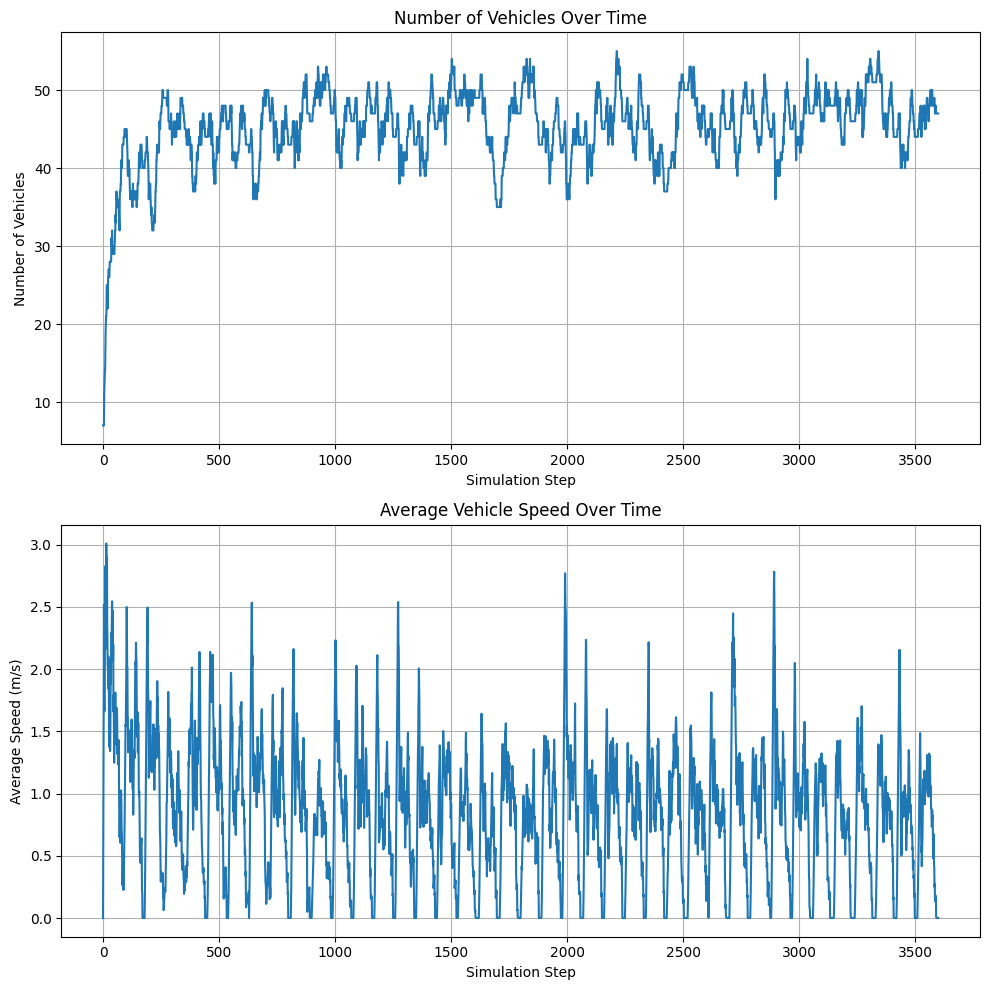

In [16]:
# Start the simulation
traci.start(["sumo", "-c", "my_simulation.sumocfg"])

step = 0
vehicle_counts = []
avg_speeds = []

while step < 3600:  # Run for 3600 seconds
    traci.simulationStep()
    vehicles = traci.vehicle.getIDList()
    vehicle_counts.append(len(vehicles))

    if vehicles:
        avg_speed = sum(traci.vehicle.getSpeed(v) for v in vehicles) / len(vehicles)
    else:
        avg_speed = 0
    avg_speeds.append(avg_speed)

    step += 1

traci.close()

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(vehicle_counts)
ax1.set_title('Number of Vehicles Over Time')
ax1.set_xlabel('Simulation Step')
ax1.set_ylabel('Number of Vehicles')
ax1.grid(True)

ax2.plot(avg_speeds)
ax2.set_title('Average Vehicle Speed Over Time')
ax2.set_xlabel('Simulation Step')
ax2.set_ylabel('Average Speed (m/s)')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import traci
import random
from collections import deque

class DQLAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0   # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = keras.Sequential([
            keras.layers.Dense(24, input_dim=self.state_size, activation='relu'),
            keras.layers.Dense(24, activation='relu'),
            keras.layers.Dense(self.action_size, activation='linear')
        ])
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

def get_state(traffic_lights):
    state = []
    for tl_id in traffic_lights:
        phase = traci.trafficlight.getPhase(tl_id)
        waiting_time = sum(traci.lane.getWaitingTime(lane) for lane in traci.trafficlight.getControlledLanes(tl_id))
        state.extend([phase, waiting_time])
    return np.reshape(state, [1, len(state)])

def get_reward(traffic_lights):
    total_waiting_time = 0
    for tl_id in traffic_lights:
        total_waiting_time += sum(traci.lane.getWaitingTime(lane) for lane in traci.trafficlight.getControlledLanes(tl_id))
    return -total_waiting_time

def run_dql_simulation():
    traci.start(["sumo", "-c", "my_simulation.sumocfg"])
    
    traffic_lights = traci.trafficlight.getIDList()
    state_size = len(traffic_lights) * 2  # phase and waiting time for each traffic light
    action_size = 2  # change phase or do nothing

    agent = DQLAgent(state_size, action_size)
    
    episodes = 10
    batch_size = 32

    for e in range(episodes):
        state = get_state(traffic_lights)
        total_reward = 0
        
        for step in range(3600):  # 1 hour simulation
            action = agent.act(state)
            
            if action == 1:  # change phase
                for tl_id in traffic_lights:
                    current_phase = traci.trafficlight.getPhase(tl_id)
                    num_phases = len(traci.trafficlight.getCompleteRedYellowGreenDefinition(tl_id)[0].phases)
                    next_phase = (current_phase + 1) % num_phases
                    traci.trafficlight.setPhase(tl_id, next_phase)
            
            traci.simulationStep()
            
            next_state = get_state(traffic_lights)
            reward = get_reward(traffic_lights)
            total_reward += reward
            
            done = step == 3599
            
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
                
        print(f"Episode: {e+1}/{episodes}, Total Reward: {total_reward}")
    
    traci.close()

if __name__ == "__main__":
    run_dql_simulation()

In [ ]:
import tensorflow as tf
traci.close()